# Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

# Lectura de archivo

In [25]:
history = pd.read_csv('Historial_Netflix.csv')
history

,Title,Date
0,Community: Temporada 1: Modern Warfare,16/8/21
1,Community: Temporada 1: Contemporary American ...,16/8/21
2,Community: Temporada 1: The Science of Illusion,16/8/21
3,Community: Temporada 1: Investigative Journalism,16/8/21
4,How to Sell Drugs Online (Fast): Temporada 2: ...,14/8/21
...,...,...
4151,El show de la pantera rosa: Temporada 1: Jet P...,16/1/15
4152,El show de la pantera rosa: Temporada 1: Pinto...,16/1/15
4153,El show de la pantera rosa: Temporada 1: Pink ...,16/1/15
4154,Pesos pesados,15/1/15


# Data

### Format

In [26]:
print(history.shape[0], "titulos de Netflix")

4156 titulos de Netflix


In [27]:
history['Date']

0       16/8/21
1       16/8/21
2       16/8/21
3       16/8/21
4       14/8/21
         ...   
4151    16/1/15
4152    16/1/15
4153    16/1/15
4154    15/1/15
4155    15/1/15
Name: Date, Length: 4156, dtype: object

In [28]:
def normalize_dates(fecha):
   d, m, y = fecha.split("/")
   return date(int("20"+y), int(m), int(d))

dates = history['Date'].astype(str).apply(normalize_dates)
dates

0       2021-08-16
1       2021-08-16
2       2021-08-16
3       2021-08-16
4       2021-08-14
           ...    
4151    2015-01-16
4152    2015-01-16
4153    2015-01-16
4154    2015-01-15
4155    2015-01-15
Name: Date, Length: 4156, dtype: object

In [29]:
history['Date'] = dates
history

,Title,Date
0,Community: Temporada 1: Modern Warfare,2021-08-16
1,Community: Temporada 1: Contemporary American ...,2021-08-16
2,Community: Temporada 1: The Science of Illusion,2021-08-16
3,Community: Temporada 1: Investigative Journalism,2021-08-16
4,How to Sell Drugs Online (Fast): Temporada 2: ...,2021-08-14
...,...,...
4151,El show de la pantera rosa: Temporada 1: Jet P...,2015-01-16
4152,El show de la pantera rosa: Temporada 1: Pinto...,2015-01-16
4153,El show de la pantera rosa: Temporada 1: Pink ...,2015-01-16
4154,Pesos pesados,2015-01-15


In [30]:
show_indexes = history['Title'].str.startswith('Community', na = False)
history[show_indexes]

,Title,Date
0,Community: Temporada 1: Modern Warfare,2021-08-16
1,Community: Temporada 1: Contemporary American ...,2021-08-16
2,Community: Temporada 1: The Science of Illusion,2021-08-16
3,Community: Temporada 1: Investigative Journalism,2021-08-16
11,Community: Temporada 2: Competitive Wine Tasting,2021-08-05
...,...,...
150,Community: Temporada 5: Poligrafía cooperativa,2021-01-24
151,Community: Temporada 5: Numismática interglute...,2021-01-24
152,Community: Temporada 5: Introducción a la ense...,2021-01-24
153,Community: Temporada 5: Repiloto,2021-01-24


In [31]:
def normalize_series(titulo):
  partes = titulo.split(":")
  if len(partes) >= 3:
      return partes[0]
  return titulo

titles = history['Title'].astype(str).apply(normalize_series)
titles

0                                     Community
1                                     Community
2                                     Community
3                                     Community
4               How to Sell Drugs Online (Fast)
                         ...                   
4151                 El show de la pantera rosa
4152                 El show de la pantera rosa
4153                 El show de la pantera rosa
4154                              Pesos pesados
4155    Mighty Morphin Power Rangers: The Movie
Name: Title, Length: 4156, dtype: object

In [32]:
show_history = pd.concat([titles, dates],axis=1)
show_history

,Title,Date
0,Community,2021-08-16
1,Community,2021-08-16
2,Community,2021-08-16
3,Community,2021-08-16
4,How to Sell Drugs Online (Fast),2021-08-14
...,...,...
4151,El show de la pantera rosa,2015-01-16
4152,El show de la pantera rosa,2015-01-16
4153,El show de la pantera rosa,2015-01-16
4154,Pesos pesados,2015-01-15


### Analisis

In [33]:
history.query("Title == 'Community: Temporada 1: The Science of Illusion'")

,Title,Date
2,Community: Temporada 1: The Science of Illusion,2021-08-16


In [34]:
tv_show = show_history.query("Title == 'Community'")

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

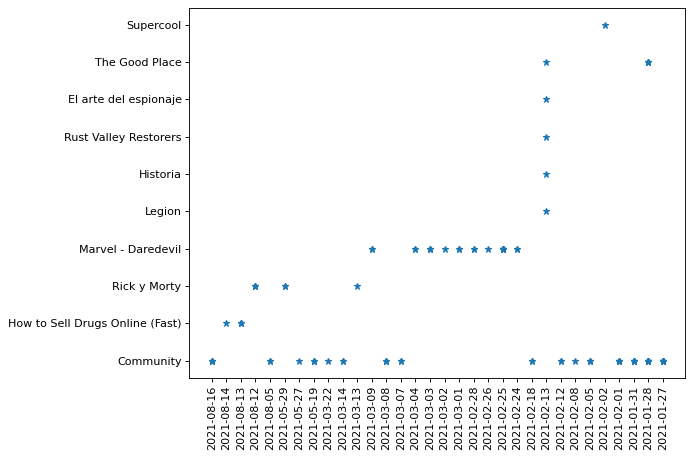

In [36]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(history['Date'].astype(str)[:100], show_history['Title'].astype(str)[:100], '*')
plt.xticks(rotation='vertical')